# Исследование продаж компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

Для того, чтобы определить потенциально прибыльный продукт, необходимо:  
- обработать предоставленные данные (изучить первоначальный датасет, проверить данные на пропуски, дубликаты, аномалии, соответствие типов данных);  
- отобрать актуальный период для анализы и выбрать наиболее популярные платформы;  
- проанализировать взаимосвязь отзывов и продаж;  
- проанализировать общее распределение игр по жанрам;  
- определить самые популярные платформы и жанры каждого региона;  
- проанализировать влияние рейтинга ESRB на продажи;  
- проверить гипотезы об равенстве рейтингов платформ Xbox и PC и разности рейтингов жанров Action и Sports.  

## Изучение и предобработка данных

### Изучение данных

In [1]:
#загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#открытие файла
data = pd.read_csv('games.csv', sep = ',')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#вывод информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица состоит из 16715 строк и 11 столбцов. В некоторых колонках наблюдается меньше значений, чем должно быть, значит, в этих колонках имеются нулевые значения, которые мы изучим на шаге "Предобработка данных". Название колонок не соответствует общепринятому регистру, приведем к необходимому виду в разделе "Изменение названий столбцов". Некоторые типы файлов не соответствуют содержанию данных, изменим тип данных в разделе "Изменение типов данных"

Имеются два типа ячеек: вещественные и текстовые.

**Описание данных**  
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

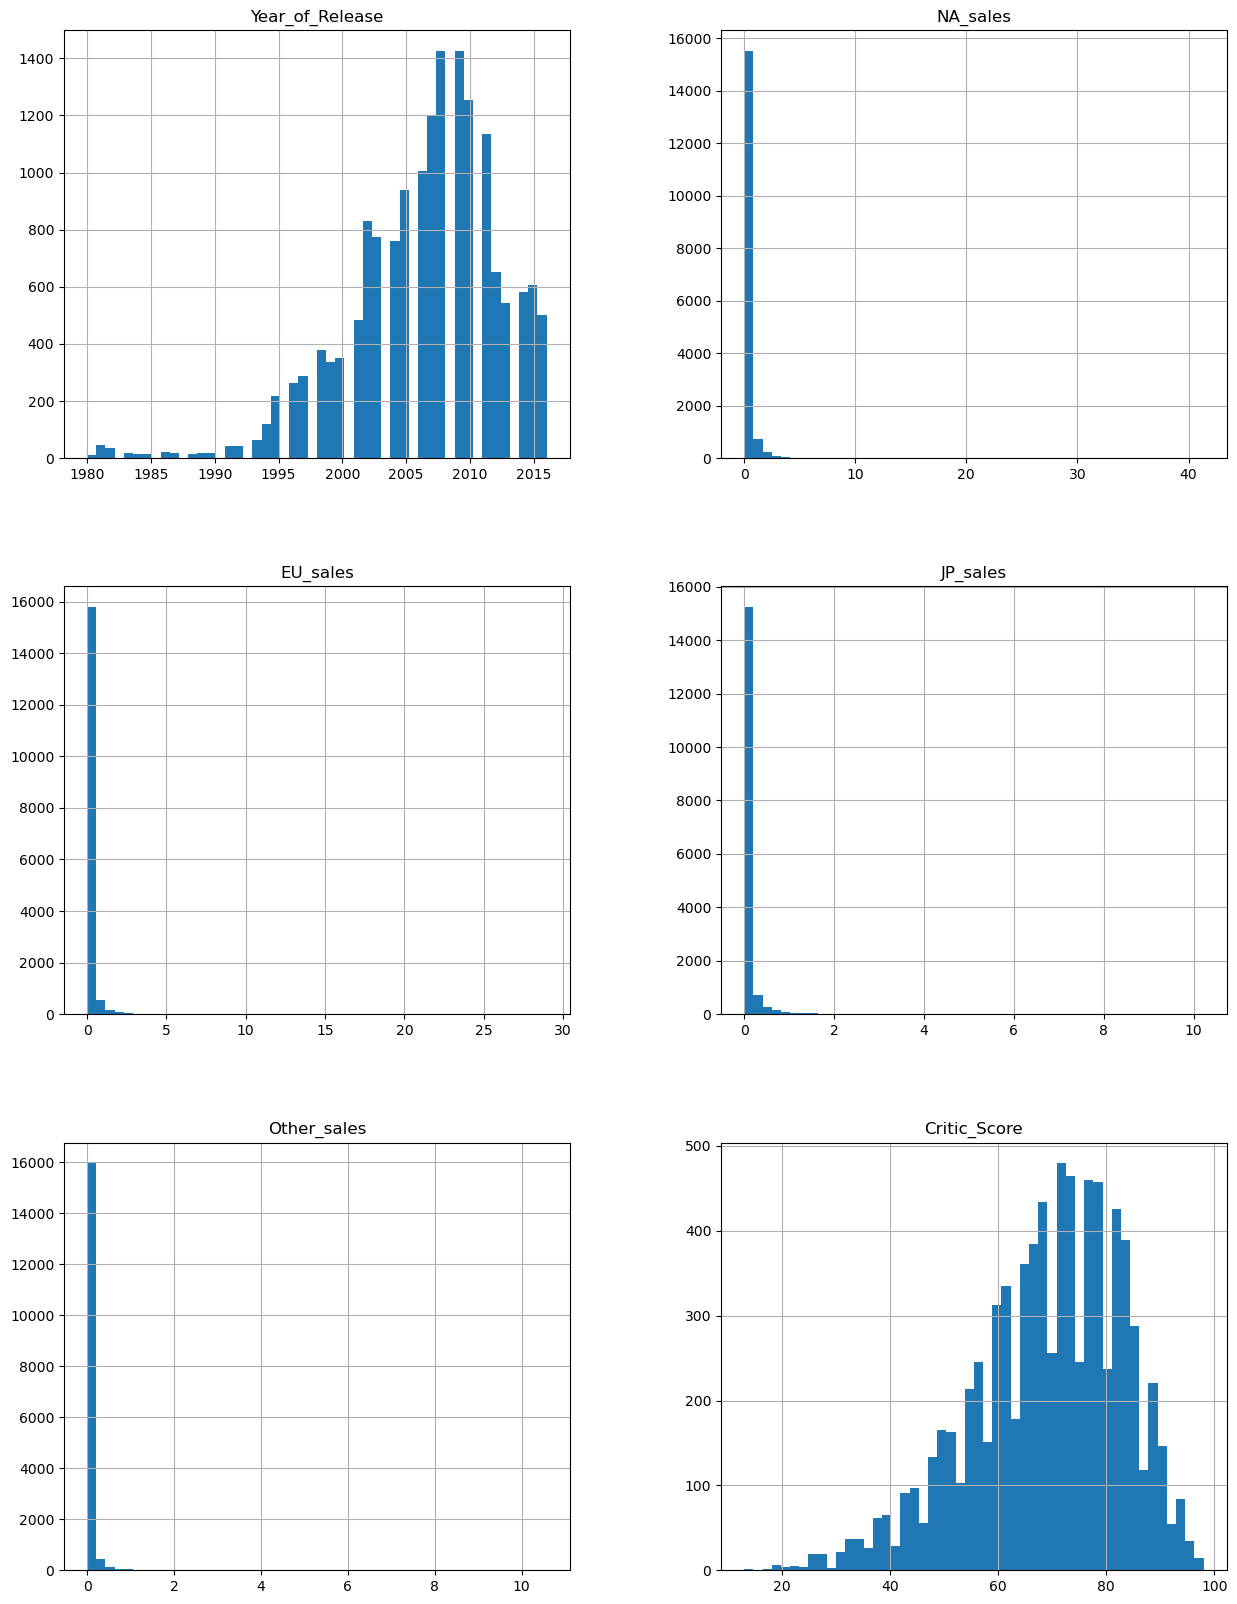

In [4]:
# предварительный просмотр гистограмм
data.hist(figsize=(15, 20),bins = 50);

По первоначальным диаграммам можно сказать следующее:  

- данные собраны за 1980-2016 гг., наибольшее количество игр было выпущено после 2000 года.  
- диаграммы по количеству продаж в регионах очень похожи, есть выбивающиеся позиции, в которых продажи очень высокие, графики нисходящие, почти 16 тыс позиция попали в один диапазон от 0 до примерно 0,25.  
- оценки критиков имеют диапазон от 0 до 100, причем наибольшее количество попадает в диапазон 65-85;  
- не было построено диаграмм для столбцов User_Score и Rating, т.к. тип ячеек указан текстовый.

Предварительно можно утверждать, что данных достаточно для анализа. Но встречаются пропуски в данных и несоответствия типов ячеек с содержащимися в них данными. Также для удобства необходимо поменять название колонок датасета и проверить на наличие дубликатов.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Переименование столбцов

При изучении данных, было обнаружено несоответствие названий колонок общепринятым нормам, исправим это.

In [5]:
# посмотрим на название колонок
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower()

In [7]:
#проверим, что все правильно переименовалось
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Столбцы переименованы корректно.

### Обработка пропусков

В датасете были обнаружены пропущенные значения. Изучим их.

In [8]:
#посчитаем кол-во пропущенных значений
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

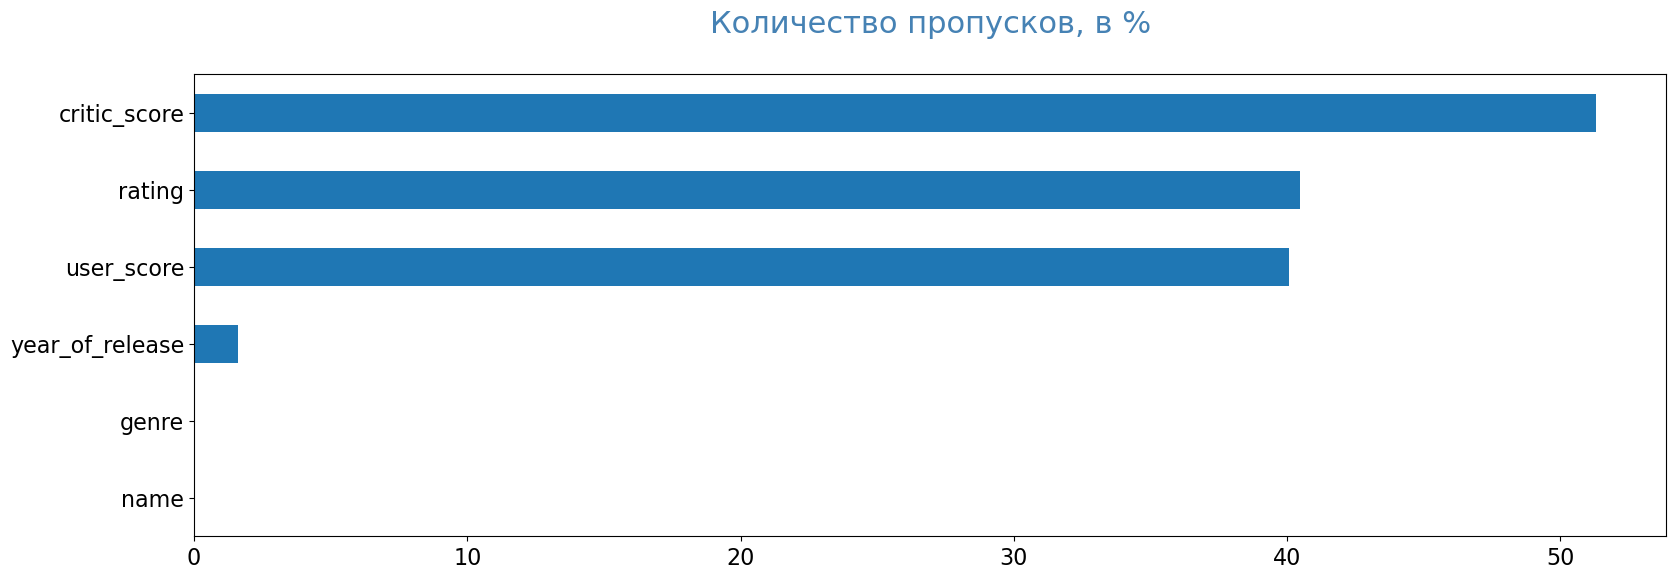

In [9]:
#выведем диаграмму пропусков    
try:
    (
    (data.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
    .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
    .set_title('Количество пропусков, в %' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    
except:
    print('пропусков не осталось :) или произошла ошибка в первой части функции ')

Больше всего значений пропущено в колонке critic_score, больше 50%. Возможно, не все игры оценивают критики, поэтому и появились пропуски. Удалять эти значения не имеет смысла, потеряем больше половины данных, заменять на другое значение тоже нецелесообразно, т.к. рейтинг каждой игры индивидуален и независим от других и заменять его на какое-либо среднее будет неправильным решением. Для того, чтобы в дальнейшем можно было использовать данные этой колонки, сделаем заглушки (555) на месте пустых значений.  

Такие же рассуждения касаются и колонок user_score (заменим на 555)  

Рейтинг ESRB появился в 1994 году, и постепенно страны начали принимать законы в об обязательной пометке в информации об игре. Возможно, поэтому не во всех играх отмечены возрастные ограничения. Проверим эту версию. 

2010.00    456
2008.00    446
2011.00    433
2009.00    415
2007.00    376
1998.00    347
2006.00    328
2012.00    298
1999.00    296
2015.00    291
1997.00    270
1996.00    256
2014.00    236
2005.00    233
2013.00    228
2016.00    222
1995.00    219
2000.00    202
2002.00    174
2004.00    164
2003.00    162
2001.00    143
1994.00    120
1993.00     62
1981.00     46
1992.00     41
1991.00     41
1982.00     36
1986.00     21
1983.00     17
1989.00     17
1990.00     16
1987.00     16
1988.00     14
1984.00     14
1985.00     13
1980.00      9
Name: year_of_release, dtype: int64


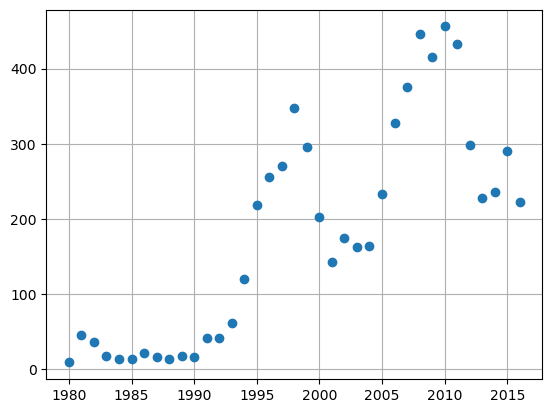

In [10]:
# посмотрим пропуски в колонке rating по годам
print(data[data['rating'].isna()]['year_of_release'].value_counts())
data[data['rating'].isna()]['year_of_release'].value_counts().plot(style = 'o', grid = True);

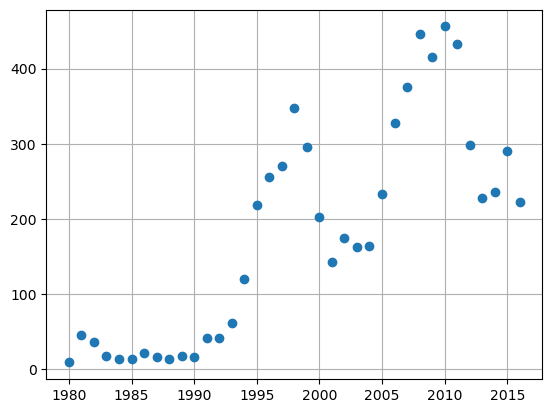

In [11]:
#построим график
data[data['rating'].isna()]['year_of_release'].value_counts().plot(style = 'o', grid = True);

Меньше всего пропусков до 1995 года, больше всего пропусков в периоды 1995-2000, с 2005-2012. Пока закономерности не выявлено. Можно углубиться в тему, посмотреть на пропуски в разрезе регионов, посмотреть законодательство регионов, историю самой организации. Можно спросить у специалистов, кто собирал базу данных, может эти рейтинги вручную искали, заполняли таблицу. Может, эти игры вообще не прошли оценку из-за разных обстоятельств.  
Поступим с пустыми значениями также, как и с оценками - заменим на 'unknown'.


Пропущенные значения в колонках year_of_release появились, возможно, из-за недостатка информации или из-за человеческого фактора. Так как мы будем определять актуальный период для анализа, год выпуска игры нам важен, поэтому строки с пропущенными данными удалим.  

Пропуски в колонках name и genre, скорее всего появились из-за человечекого фактора. Таких строк всего 2 шт, удалим их.

In [12]:
# в critic_score ставим заглушку 555
data['critic_score'] = data['critic_score'].fillna(555)
#display(data.query('critic_score == "555"'))

In [13]:
# в user_score ставим заглушку 555
data['user_score'] = data['user_score'].fillna(555)

In [14]:
#удалим строки с пропущенным годом
data = data.dropna(subset = ['year_of_release'])

In [15]:
#посмотрим строки с нулевыми значениями в имени и в жанре
(data[data.genre.isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,555.00,555,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,555.00,555,NaN


In [16]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,555.00,555,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,555.00,555,NaN


Про эти 2 игры мало информации, нет названия, жанра, рейтингов. Смело удалим эти строки.

In [17]:
#удалим эти строки
data = data.dropna(subset = ['name'])

In [18]:
# в rating заменим на 'unknown'
data['rating'] = data['rating'].fillna('unknown')

Выведем значения с пользовательским рейтингом равным tbd

In [19]:
data.loc[data['user_score'] == "tbd"]['user_score'].count()

2376

In [20]:
data.loc[data['user_score'] == "tbd"].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.00,Sports,3.45,2.59,0.00,0.66,555.00,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.00,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011.00,Sports,1.51,1.03,0.00,0.27,555.00,tbd,T
645,uDraw Studio,Wii,2010.00,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
718,Just Dance Kids,Wii,2010.00,Misc,1.52,0.54,0.00,0.18,555.00,tbd,E


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим на заглушки 555.

In [21]:
data.loc[(data['user_score'] == 'tbd'), 'user_score'] =  555
data.loc[data['user_score'] == "tbd"]['user_score'].count()

0

In [22]:
# посмотрим сколько нулевых значений осталось
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски обработаны.

### Изменение типов данных

Посмотрим, какие типы данных есть в таблице

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Содержащие данные в восьми колонках соответсвуют содержанию, проверим данные в колонках year_of_release, critic_score, user_score 

In [24]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [25]:
data['critic_score'].unique()

array([ 76., 555.,  82.,  80.,  89.,  58.,  87.,  91.,  61.,  97.,  95.,
        77.,  88.,  83.,  94.,  93.,  85.,  86.,  98.,  96.,  90.,  84.,
        73.,  74.,  78.,  92.,  71.,  72.,  68.,  62.,  49.,  67.,  81.,
        66.,  56.,  79.,  70.,  59.,  64.,  75.,  60.,  63.,  69.,  50.,
        25.,  42.,  44.,  55.,  48.,  57.,  29.,  47.,  65.,  54.,  20.,
        53.,  37.,  38.,  33.,  52.,  30.,  32.,  43.,  45.,  51.,  40.,
        46.,  39.,  34.,  41.,  36.,  31.,  27.,  35.,  26.,  19.,  28.,
        23.,  24.,  21.,  17.,  13.])

In [26]:
data['user_score'].unique()

array(['8', 555, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

В столбце 'critic_score' нет дробных значений, преобразуем тип столбца в целочисленный  
В столбце 'user_score' есть дробные значения, преобразуем тип столбца в дробный  
В столбце 'year_of_release' содержится только год, преобразуем в целочисленный

In [27]:
#изменение типов данных
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)
data['user_score'] = data['user_score'].astype(float)

In [28]:
# проверим, корректно ли изменились типы
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


Теперь типы данных корректны.

In [29]:
agg_games_year_genre_platform = data.groupby(
        ['year_of_release', 'genre', 'platform']).agg({'name': 'count'})
agg_games_year_score = data.groupby(
        ['year_of_release', 'genre', 'platform']).agg({'critic_score': 'mean', 'user_score': 'mean'})
agg_games_year_genre_platform

name
year_of_release genre    platform      
1980            Action   2600         1
                Fighting 2600         1
                Misc     2600         4
                Shooter  2600         2
                Sports   2600         1
...                                 ...
2016            Strategy 3DS          1
                         PC           8
                         PS4          2
                         PSV          1
                         XOne         1

[1809 rows x 1 columns]

In [30]:
agg_games_year_score

critic_score  user_score
year_of_release genre    platform                          
1980            Action   2600            555.00      555.00
                Fighting 2600            555.00      555.00
                Misc     2600            555.00      555.00
                Shooter  2600            555.00      555.00
                Sports   2600            555.00      555.00
...                                         ...         ...
2016            Strategy 3DS             555.00      555.00
                         PC              200.50      144.21
                         PS4             321.50      281.50
                         PSV             555.00      555.00
                         XOne             87.00        8.10

[1809 rows x 2 columns]

### Обработка дубликатов

Проверим на наличие явных и неявных дубликатов

In [31]:
#кол-во явных дубликатов
data.duplicated().sum()

0

Поищем неявные дубликаты, повторы могут быть по именам. Посмотрим количество повторов в колонке name.

In [32]:
data.sort_values(by = 'name')['name'].value_counts().head(10)

Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
LEGO Jurassic World             8
Madden NFL 07                   8
LEGO The Hobbit                 8
Monopoly                        8
FIFA 15                         8
Name: name, dtype: int64

Выведем все игры Need for Speed: Most Wanted, найдем причину повторения 12 раз этой игры в таблице

In [33]:
#data.sort_values(data.columns.tolist()).head(20)
data[data['name'] == 'Need for Speed: Most Wanted']
#data[data['living_area']<9]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.10,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,555,555.00,unknown
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.50,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.50,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.80,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,555,555.00,unknown
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.10,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.50,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,555,555.00,unknown
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.10,E


Видим, что это не дубликаты, а название одной игры, выпущенной в разные года на разные платформы. Скорее всего это касается и других игр.

Поищем неявные дубликаты с одинаковым значениями в колонках: name, platform, year_of_release, genre

In [34]:
data.duplicated(subset=['name',  'platform' ,'year_of_release', 'genre']).sum()

1

In [35]:
#Посмотрим, что это за дубликат
data[data.duplicated(['name',  'platform' ,'year_of_release', 'genre'], keep = 'first')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.50,E


In [36]:
data[data.duplicated(['name',  'platform' ,'year_of_release', 'genre'], keep = 'last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.50,E


Удалим строку №16230, т.к. в ней нет информации по продажам в регионах.

In [37]:
#удаляем строку-дубликат
data.drop(labels = 16230, axis=0, inplace=True)

In [38]:
#проверяем, удалилась ли строка
data.loc[16229:16231]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16229,Dr. Slump & Arale-Chan,DS,2008,Adventure,0.00,0.00,0.01,0.00,555,555.00,unknown
16231,Umineko no Naku Koro ni Portable 1,PSP,2011,Adventure,0.00,0.00,0.01,0.00,555,555.00,unknown


Явные и неявные дубликаты обработаны.

### Обработка аномальных значений

Для того, чтобы понять есть ли аномальные значения, надо проверить уникальные значения каждого столбца.

In [39]:
#создадим функцию вывода уникальных значений каждого столбца
def unique_in_column (data):
    for column in data.columns:
        print('Уникальные значения в столбце', column)
        print(data.sort_values(by = column)[column].unique())

In [40]:
# выведем уникальные значения
unique_in_column(data)

Уникальные значения в столбце name
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
Уникальные значения в столбце platform
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
Уникальные значения в столбце year_of_release
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Уникальные значения в столбце genre
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']
Уникальные значения в столбце na_sales
[0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01
 1.400e-01

Просмотрев все столбцы, аномальных значений не выявлено, заострим внимание на rating. Посмотрим расшифровку каждого значения.

Сравним Рейтинг игр ESRB со значениями в столбце rating.  

  «EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех»   
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет   
«M» («Mature») — «Для взрослых»   
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»:  
K-A: Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т. 

In [41]:
data['rating'].value_counts()

unknown    6676
E          3920
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Аномальных значений не выявлено, все соответствует реальному рейтингу ESRB.

Посмотрим, есть ли выбивающиеся значения в колонках 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'.

In [42]:
# выведем количественные характеристики этих столбцов
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16443.00,16443.00,16443.00,16443.00
mean,0.26,0.15,0.08,0.05
std,0.82,0.51,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


Максимальные значения сильно отклоняются от других показателей. Посмотрим на гистограммы.

Сделаем гистограммы разброса продаж по регионам.

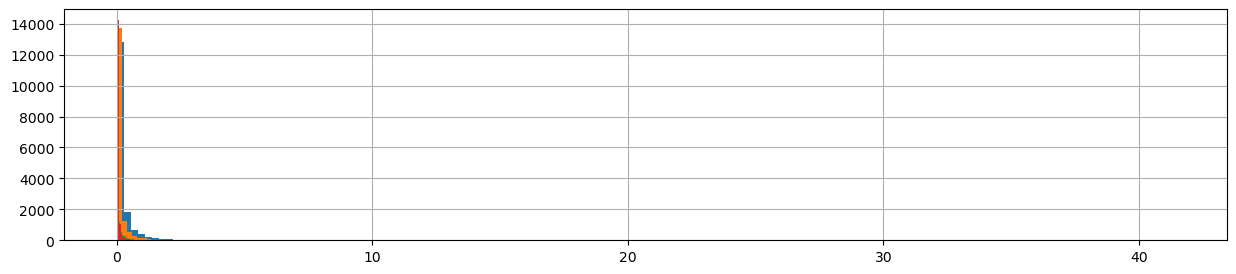

In [43]:
data.na_sales.hist(bins = 150, figsize = (15,3));
data.eu_sales.hist(bins = 150, figsize = (15,3));
data.jp_sales.hist(bins = 150, figsize = (15,3));
data.other_sales.hist(bins = 150, figsize = (15,3));

Гистограммы очень похожи, вначале есть большие скопление, потом график идет на спад и после значения 5 есть единичиные случаи игр с высокими продажами. Посмотрим эти случаи в таблице по каждому региону.

In [44]:
# таблицы с самыми продаваемыми играми по регионам
display(data.sort_values(by='na_sales', ascending = False).head(5))
display(data.sort_values(by='eu_sales', ascending = False).head(5))
display(data.sort_values(by='jp_sales', ascending = False).head(5))
data.sort_values(by='other_sales', ascending = False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,555,555.00,unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,555,555.00,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,555,555.00,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,555,555.00,unknown
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77,7.90,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,555,555.00,unknown
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,555,555.00,unknown
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,555,555.00,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.50,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,555,555.00,unknown


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.00,M
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.50,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E


Есть игры- лидеры, которые по количеству продаж превышают остальные позиции. Аномалии не выявлено. Если удалить выбивающиеся значения, то будет искажение в дальнейшем анализе данных. 

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [45]:
# добавим колонку с суммарными продажами
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#поменяем местоположение последнего столбца
data = data[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales',\
      'critic_score', 'user_score', 'rating']]

# проверим, что все корректно добавлено
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,555,555.00,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,555,555.00,unknown


Проверка процента удаления

In [46]:
#сравниваем первоначальный файл с обработанным
try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep='\t')
except:
    df_check = pd.read_csv('games.csv', sep='\t')
print('Потерь записей:', ("{:.2%}".format(1-data.shape[0]/df_check.shape[0])))

Потерь записей: 1.63%


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   all_sales        16443 non-null  float64
 9   critic_score     16443 non-null  int32  
 10  user_score       16443 non-null  float64
 11  rating           16443 non-null  object 
dtypes: float64(6), int32(2), object(4)
memory usage: 2.0+ MB


Все аномальные значения обработаны.

### Выводы

In [48]:
# Посмотрим, что осталось
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(data.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, data[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',data[col_l].isna().sum(),
        ', процент NaN', round(data[col_l].isna().sum()/len(data)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   all_sales        16443 non-null  float64
 9   critic_score     16443 non-null  int32  
 10  user_score       16443 non-null  float64
 11  rating           16443 non-null  object 
dtypes: float64(6), int32(2), object(4)
memory usage: 2.0+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

В каждой строке таблицы — данные, указанные о компьютерной игре. В колонках описывается название игры, платформа, на которую выпущена игра, год выпуска, жанр, кол-во проданных копий в Свеверной Америке, Европе, Японии, остальных странах, рейтинги критиков и пользователей, рейтинг по возрастной категории.

Данные были подготовлены следующим образом:  
- Земенен регистр названия колонок в соответствии с общепринятым;  

- Обработаны пропуски:
-- critic_score, user_score - пустые значения заполнены "заглушками" (555);   
-- rating - пропуски заполнены значением "unknown";    
-- year_of_release - строки с пропусками удалены;  
-- name - строки с пропусками удалены;  
-- genre - строки с пропусками удалены;  

- Изменены типы данных:
  critic_score в целочисленный;
  user_score в вещественный;
  year_of_release в вещественный;
  
- Поиск дубликатов выявил одну повторяющуюся строку, наименее информативная была удалена  

- Поиск аномалий не дал результата, аномалий не выявлено.

С подготовленными данными можно проводить дальнейший анализ.

## Исследовательский анализ

### Выявление актуального периода и наиболее популярных платформ

Для анализа нет необхоимости использовать данные за весь период ( с 1980 по 2016 года),  достаточно будет выбрать актуальные года и анализировать данные по ним.  

Посмотрим сколько игр выпускалось в разные годы

In [49]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Text(0.5, 1.0, 'Продажи игр по годам')

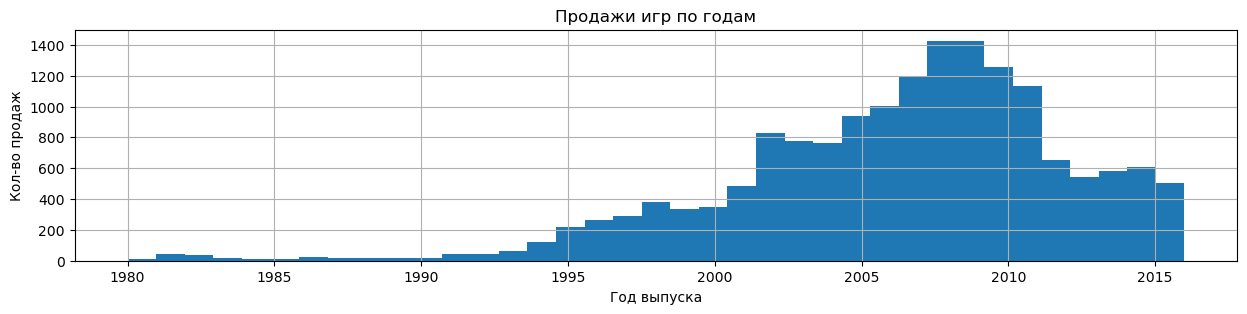

In [50]:
data['year_of_release'].hist(bins = 37, figsize = (15,3));
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во продаж")
plt.title('Продажи игр по годам')

Больше всего игр выпускалось в 2006 - 2011 годах, меньше всего до 1995 года. Резкое падение было в 2012 году и начиная с 2012 кол-во выпускаемых игр колебалось от 500 до 650 шт в год. 

Посмотрим, как менялись продажи по платформам. Выберем наиболее популярные платформы и построим для них распределение продаж по годам

In [51]:
data.groupby(by = 'platform')['all_sales'].sum().sort_values(ascending = False).to_frame()

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


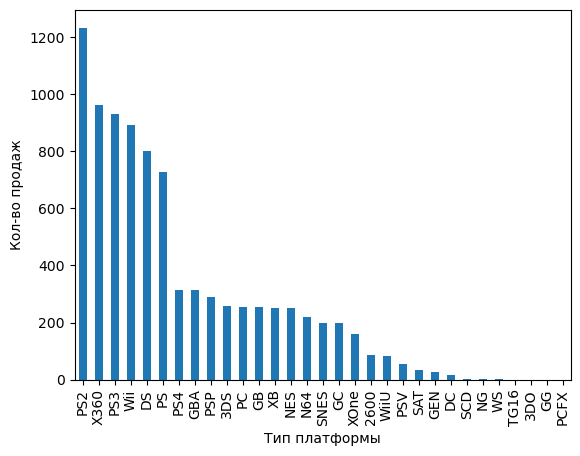

In [52]:
data.groupby(by = 'platform')['all_sales'].sum().sort_values(ascending = False).plot(kind='bar')
plt.xlabel("Тип платформы")
plt.ylabel("Кол-во продаж");

На графике хорошо видно, что самой популярной платформой является PS2, далее идет группа чуть менее популярных - X360, PS3, Wii, DS, PS. Далее идет характерный спад кол-ва продаж для других платформ. Наименее популярные GG и PSFX. Поэтому для дальнейшего анализа возьмем эти шесть наиболее популярных платформ.

In [53]:
#для дальнейшей работы сделаем отдельную переменную для среза по популярным платформам
data_most_pop_games = data.query('platform == ["PS2", "X360","PS3","Wii", "DS", "PS"]')

Найдем примерный жизненный цикл платформы. Посмотрим количество продаж наиболее популярных платформ в разные года.

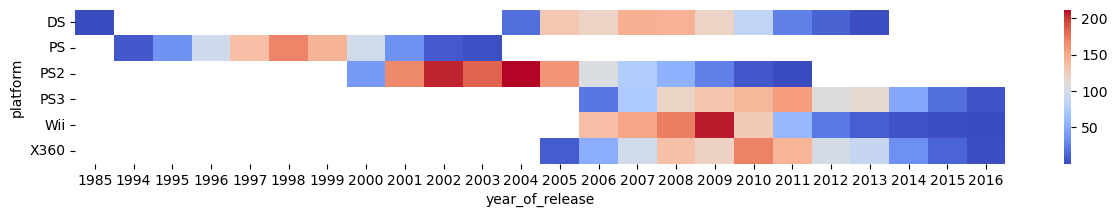

In [54]:
# сделаем сводную таблицу по платформам
life_of_platform = data_most_pop_games.pivot_table(index= 'platform',\
                 columns = 'year_of_release',\
                 values='all_sales',\
                 aggfunc='sum')

#построим хитмэп
plt.figure(figsize = (15,2))
sns.heatmap(life_of_platform, cmap="coolwarm");

Инетерсный артефакт у платформы DS. На графике видныданные за 1985 год, но платфрмы тогда не существовало. Очевидно, что в данные закаралась ошибка.

In [55]:
#
data_most_pop_games.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,0.02,555,555.00,unknown


Удалим эту строку.

In [56]:
data.drop(labels = 15957, axis=0, inplace=True)

In [57]:
data.loc[15956:15958]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
15956,San Goku Shi DS 2,DS,2007,Strategy,0.00,0.00,0.02,0.00,0.02,555,555.00,unknown
15958,Shin Sangoku Musou Online: Souten Ranbu,PS3,2010,Action,0.00,0.00,0.02,0.00,0.02,555,555.00,unknown


Проанализиров шесть наиболее популярных платформ, можно сделать вывод, что в среднем за 3-4 года продажи игр на платформу резко падают. Для актуального периода возьмем 4 года - 2016, 2015, 2014, 2013 гг.

Для дальнейшей работы, сделаем срез датасета на последние 4 года

In [58]:
# создание таблицы с актуальными данными
data_last_four_year = data.query('year_of_release == [2016, 2015, 2014, 2013]')

Выявим, какие платформы являются потенциально прибыльными. Сделаем график по продажам игр за актуальный период.

In [59]:
sales_platforms = data_last_four_year.pivot_table(index='platform',\
                 columns = 'year_of_release',\
                 values='all_sales',\
                 aggfunc='sum')
sales_platforms

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


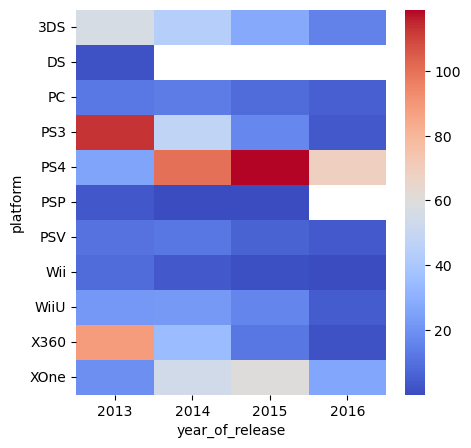

In [60]:
plt.figure(figsize = (5,5))
sns.heatmap(sales_platforms, cmap="coolwarm");

По графику видим, что все платформы переживают спад в продажах. в 2016 году игры выпускали для 9 платформ. Можем определить платформы, которые популярнее остальных в 2016 году. Это PS4, XOne. Учтем также PC. Компьютер - универсальный инструмент, для игр не требует дополнительных расходов, есть почти в каждом доме. Отметим еще Wii, т.к. продажи незначительно упали за 2013-2016 года, а значит интерес к играм на этой платформе еще будет актуален ближайшие года.

Построим диаграмму размаха по глобальным продажам игр в разбивке по популярным платформам за актуальный период.

In [61]:
#выявим топ платформ по продажам за актуальный период
data_last_four_year.groupby(by = 'platform')['all_sales'].sum().sort_values(ascending = False).to_frame()

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Наиболее популярными платформами за 2012-2016 года являются - PS4, PS3, XOne, 3DS, X360.  
Построим диаграмму.

In [62]:
#создадим переменную с данными по топ-5 платформам за актуальный период
data_top_platform_actual = data_last_four_year.query("platform == ['PS4', 'PS3', 'XOne', '3DS', 'X360']")

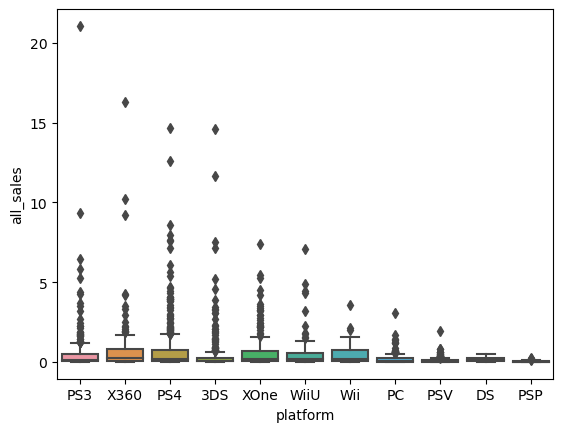

In [63]:
#построим график
sns.boxplot(data=data_last_four_year, x = "platform", y = "all_sales");

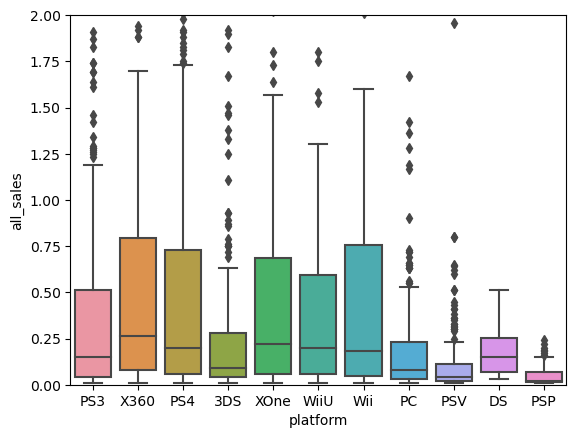

In [64]:
#изменим масштаб графика по оси У
sns.boxplot(data=data_last_four_year, x = "platform", y = "all_sales");
plt.ylim(0, 2);

In [65]:
#выведем количественные характеристики
data_last_four_year.groupby('platform')['all_sales'].describe( )

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.00,0.47,1.38,0.01,0.04,0.09,0.28,14.60
DS,8.00,0.19,0.17,0.03,0.07,0.15,0.25,0.51
PC,189.00,0.21,0.35,0.01,0.03,0.08,0.23,3.05
PS3,345.00,0.53,1.45,0.01,0.04,0.15,0.51,21.05
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSP,67.00,0.05,0.06,0.01,0.01,0.02,0.07,0.24
PSV,358.00,0.09,0.15,0.01,0.02,0.04,0.11,1.96
Wii,23.00,0.59,0.92,0.01,0.04,0.18,0.76,3.58
WiiU,115.00,0.56,1.04,0.01,0.06,0.20,0.60,7.09


Итак, медианное значение  на действующих платформах примерно на одном уровне - от 0.09 до 0.27 млн копий. Наибольшее кол-во значений у каждой платформы лежит в промежутке от 0,28 до 0,80. На платформе X360 самый большой промежуток(0.08-0.80), куда попадает большинство значение. Самы маленький диапазон у платформы PSP 0.01-0.07 млн. копий. Почти на всех платформах есть большое количество значений, выбивающихся из нормальных значений, кроме платормы DS. Это говорит о том, что на каждой популярной платформе  есть игры, которые продаются намного лучше других, кроме DS. Самая продаваемая игра за последние 4 года была на платформе PS3 - 21.05 млн.копий. На всех платформах есть игры, продаваемых около 0.01 млн. копий, кроме DS.

Для дальнейшей работы мы выявили актуальный период (2012-2016 гг) и наиболее популярные платформы (PS4, PS3, XOne, 3DS, X360). Определены потенциально прибыльные платформы (PS4, XOne, PC). Проанализировали продажи игр на актуальные платформы за актуальный период. 

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

Построим графики рассеяние "оценка критиков - все продажи" и "оценка пользователей - все продажи" по наиболее популярной платформе (PS4)

In [66]:
#отфильтруем датасет по самой популярной платформе - ps4
data_ps4 = data_top_platform_actual.query("platform == 'PS4'")

Коэффициент корреляции оценка критиков - продажи: -0.13


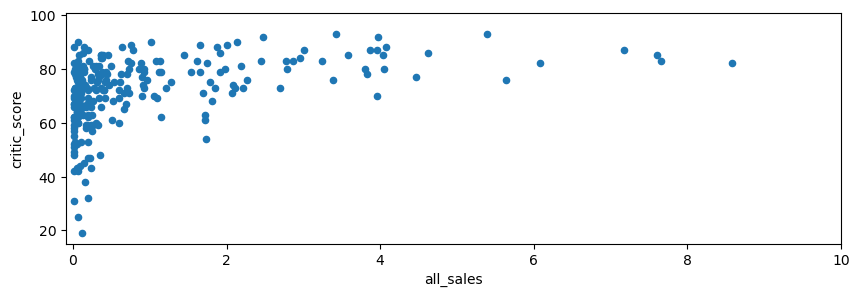

In [67]:
#построим график рассеяния 
data_ps4.query('critic_score < 110')\
    .plot(kind='scatter', y = 'critic_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка критиков - продажи:", round(data_ps4['critic_score'].corr(data_ps4['all_sales']),2))

Коэффициент корреляции оценка пользователей - продажи: -0.13


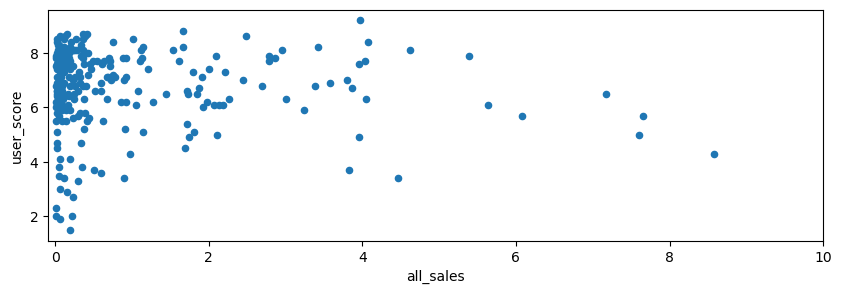

In [68]:
data_ps4.query('user_score < 15')\
    .plot(kind='scatter', y = 'user_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

print("Коэффициент корреляции оценка пользователей - продажи:", round(data_ps4['user_score'].corr(data_ps4['all_sales']),2))

По графикам видно, что самые продаваемые игры высоко оценены критиками, а у игр с низкими оценками количество продаж близко к нулю. Коэффициент корреляции (-0.13) показывает, что связь не прямая и не сильная и не линейная. Скорее это говорит о том, что напрямую продажи не зависят от рейтинга. Возможно, интересные и качественные игры продаются хорошо и хорошо оценены критиками.  
С оценками пользователей картина похожая, но больше разброс. Не все высокопродаваемые игры оценены высоко. А самая продаваемая игра вообще оценена примерно на 4. Коэффициент продажи такой же и в предыдущем анализе. Связь тут малоуловима. 
Разброс можно объяснить тем, что пользователи оценивают игры субъективно, опираясь на свои предпочтения.

Построим такие же графики для других популярных платформ

Построим графики рассеяние "оценка критиков - все продажи" и "оценка пользователей - все продажи" для платформы PS3

Коэффициент корреляции оценка критиков - продажи: -0.2
Коэффициент корреляции оценка пользователей - продажи: -0.22


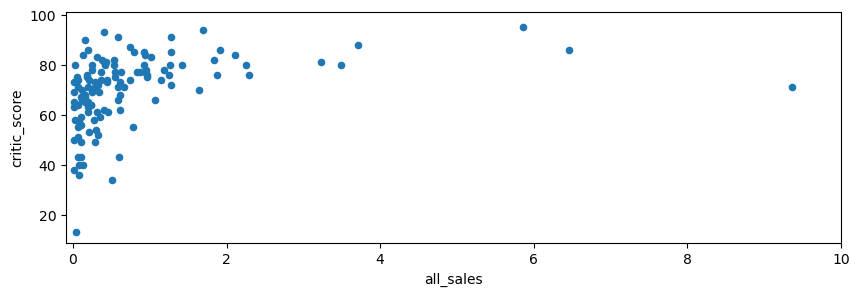

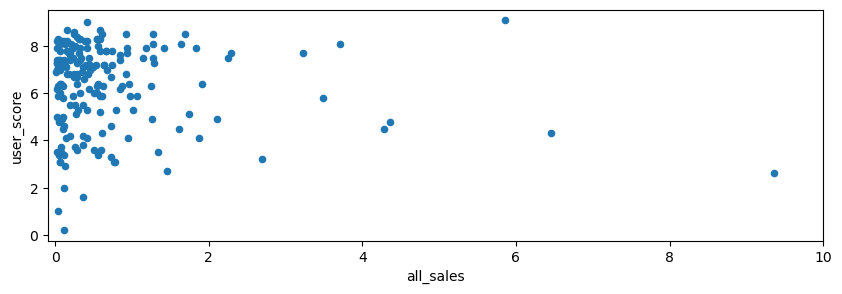

In [69]:
#отфильтруем датасет по платформе - PS3
data_PS3 = data_top_platform_actual.query("platform == 'PS3'")

#построим график рассеяния 
data_PS3.query('critic_score < 110')\
    .plot(kind='scatter', y = 'critic_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка критиков - продажи:", round(data_PS3['critic_score'].corr(data_PS3['all_sales']),2))

#построим график рассеяния 
data_PS3.query('user_score < 15')\
    .plot(kind='scatter', y = 'user_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка пользователей - продажи:", round(data_PS3['user_score'].corr(data_PS3['all_sales']),2))

Построим графики рассеяние "оценка критиков - все продажи" и "оценка пользователей - все продажи" для платформы XOne

Коэффициент корреляции оценка критиков - продажи: -0.16
Коэффициент корреляции оценка пользователей - продажи: -0.15


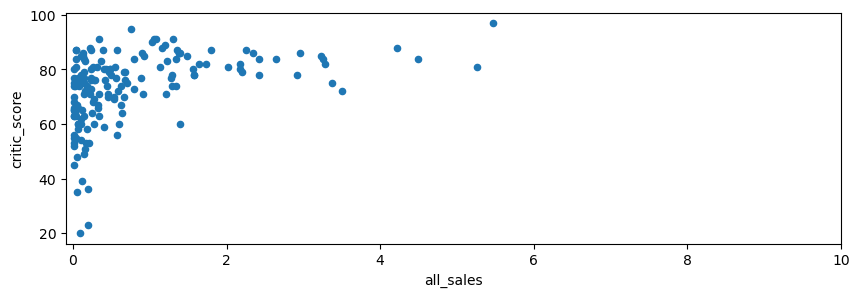

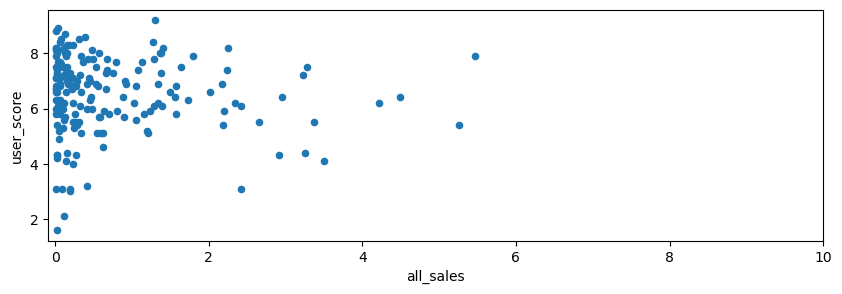

In [70]:
#отфильтруем датасет по платформе - XOne
data_XOne = data_top_platform_actual.query("platform == 'XOne'")

#построим график рассеяния 
data_XOne.query('critic_score < 110')\
    .plot(kind='scatter', y = 'critic_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка критиков - продажи:", round(data_XOne['critic_score'].corr(data_XOne['all_sales']),2))

#построим график рассеяния 
data_XOne.query('user_score < 15')\
    .plot(kind='scatter', y = 'user_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка пользователей - продажи:", round(data_XOne['user_score'].corr(data_XOne['all_sales']),2))

Построим графики рассеяние "оценка критиков - все продажи" и "оценка пользователей - все продажи" для платформы 3DS

Коэффициент корреляции оценка критиков - продажи: -0.03
Коэффициент корреляции оценка пользователей - продажи: -0.03


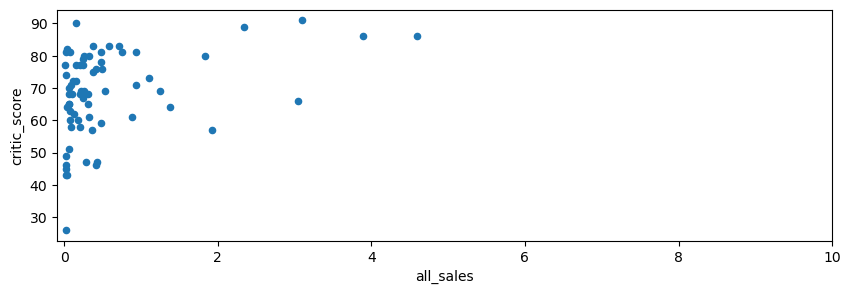

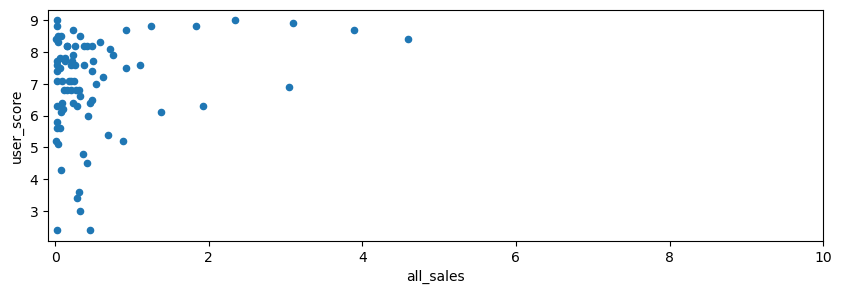

In [71]:
#отфильтруем датасет по самой платформе - 3DS
data_3DS = data_top_platform_actual.query("platform == '3DS'")

#построим график рассеяния 
data_3DS.query('critic_score < 110')\
    .plot(kind='scatter', y = 'critic_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка критиков - продажи:", round(data_3DS['critic_score'].corr(data_3DS['all_sales']),2))

#построим график рассеяния 
data_3DS.query('user_score < 15')\
    .plot(kind='scatter', y = 'user_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка пользователей - продажи:", round(data_3DS['user_score'].corr(data_3DS['all_sales']),2))

Построим графики рассеяние "оценка критиков - все продажи" и "оценка пользователей - все продажи" для платформы X360

Коэффициент корреляции оценка критиков - продажи: -0.16
Коэффициент корреляции оценка пользователей - продажи: -0.08


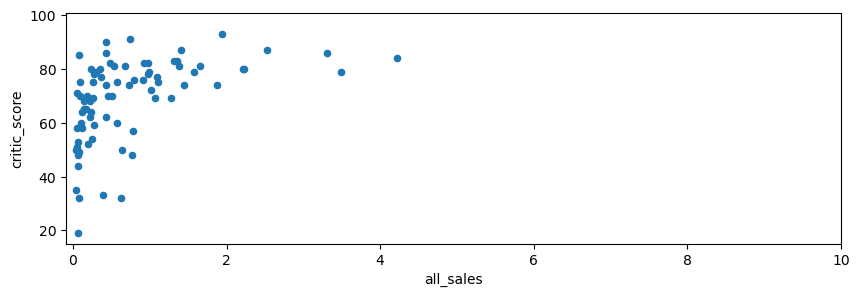

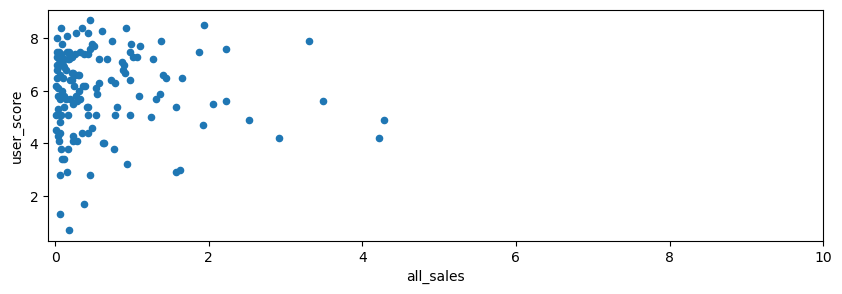

In [72]:
#отфильтруем датасет по платформе - X360
data_X360 = data_top_platform_actual.query("platform == 'X360'")

#построим график рассеяния 
data_X360.query('critic_score < 110')\
    .plot(kind='scatter', y = 'critic_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка критиков - продажи:", round(data_X360['critic_score'].corr(data_X360['all_sales']),2))

#построим график рассеяния 
data_X360.query('user_score < 15')\
    .plot(kind='scatter', y = 'user_score', x = 'all_sales', figsize = (10,3))
plt.xlim([-0.09,10])

#посчитаем коэффициент корреляции
print("Коэффициент корреляции оценка пользователей - продажи:", round(data_X360['user_score'].corr(data_X360['all_sales']),2))

На графиках для всех популярных платформ мы наблюдаем похожую картину. Разброс оценок пользователeй больше, чем у критиков. Но чем больше было продаж у игры, тем больше высоких оценок. Данные сосредоточены в верхнем левом углу, что означает, что наибольшему количество игр поставлены оценки выше средней.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Найдем самые прибыльные жанрах.

Возьмем игры за актуальный период и посчитаем количество игр каждого жанра.

In [73]:
data_last_four_year.groupby('genre').agg({'all_sales':['count', 'sum']})

all_sales       
                 count    sum
genre                        
Action             766 321.87
Adventure          245  23.64
Fighting            80  35.31
Misc               155  62.82
Platform            74  42.63
Puzzle              17   3.17
Racing              85  39.89
Role-Playing       292 145.89
Shooter            187 232.98
Simulation          62  21.76
Sports             214 150.65
Strategy            56  10.08

Для того, чтобы определить потенциально прибыльные жанры, мы не можем опираться только на количество продаж, так как в рамках одного жанра могла быть очень популярная игра, которая на себя вытянула максимум продаж. А нам надо определить игры, которые стабильно буду иметь спрос и он будет максимальным.

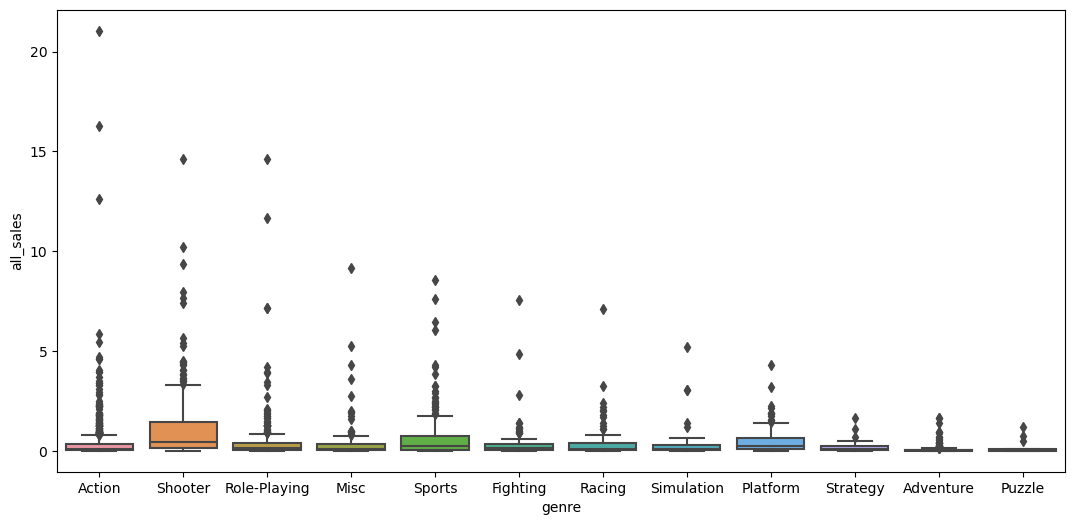

In [74]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=data_last_four_year, x = "genre", y = "all_sales");

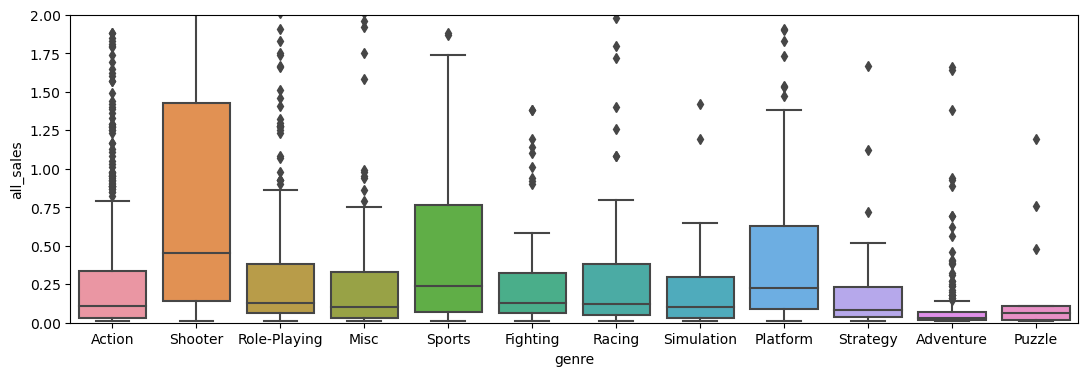

In [75]:
plt.figure(figsize=(13, 4))
sns.boxplot(data=data_last_four_year, x = "genre", y = "all_sales");
plt.ylim(0, 2);

In [76]:
# медианы продаж
data_last_four_year.groupby('genre')['all_sales'].median().sort_values(ascending = False)

genre
Shooter        0.45
Sports         0.24
Platform       0.22
Role-Playing   0.12
Fighting       0.12
Racing         0.12
Action         0.11
Simulation     0.10
Misc           0.10
Strategy       0.08
Puzzle         0.06
Adventure      0.03
Name: all_sales, dtype: float64

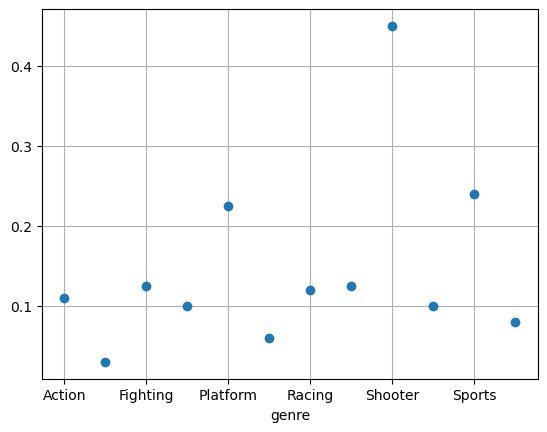

In [77]:
# визуализаия медиан продаж
data_last_four_year.groupby('genre')['all_sales'].median().plot(grid = True, style = 'o');

Самыми прибыльными жанрами будут те, которые приносят постоянный максимальный стабильный доход. Поэтому для определения потенциально прибыльных жанров, выберем те, у которых максимальная медиана. Это игры в жанрах Shooter, Sports, Platform.
Это означает, что за последние 4 года, средний показатель продаж на игру в жанре Shooter был 0,45 млн.экз., Sports 0,24 млн.экз., а Platform - 0,22 млн. экз. Наименее прибыльные Adventure - 0.03 млн.экз., Puzzle - 0,06 млн.экз., Strategy - 0,08 млн.экз.

### Выводы

В исследовательском анализе данных были определены:
- наиболее популярные платформы за весь период - это PS2, X360, PS3,Wii, DS, PS;
- определен актуальный период для изучения - это 2012-2016 гг.;
- для этого периода определены наиболее популярные платформы, - это PS4, PS3, XOne, 3DS, X360 и потенциально прибыльные (PS4, XOne, PC);
- взимосвязь продаж и рейтингов. Выяснено, что у наиболее продаваемых игр в основном высокие рейтинги критиков, но не всегда высокие рейтинги пользователей;  
- наиболее популярными жанравми, а значит и потенциально прибыльными, являются Shooter, Sports, Platform.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5) и самые популярные жанры. Найдем долю подаж. 

In [78]:
#создадим функцию, создающую таблицу топ-5 по региону и по категории
def table_for_region(category, region):
    table =  data_last_four_year\
          .groupby(category)[region]\
          .sum()\
          .sort_values(ascending = False)\
          .head(5)
    return table

In [79]:
# выведем таблицу топ-5 платформ в Северной Америке
na_platform = table_for_region('platform', 'na_sales')
print('Популярные платформы в Северной Америке',' ', na_platform, sep = '\n')


Популярные платформы в Северной Америке
 
platform
PS4    108.74
XOne    93.12
X360    81.66
PS3     63.50
3DS     38.20
Name: na_sales, dtype: float64


In [80]:
# выведем таблицу топ-5 платформ в Европе
eu_platform = table_for_region('platform', 'eu_sales')
print('Популярные платформы в Европе',' ', eu_platform , sep = '\n')


Популярные платформы в Европе
 
platform
PS4    141.09
PS3     67.81
XOne    51.59
X360    42.52
3DS     30.96
Name: eu_sales, dtype: float64


In [81]:
# выведем таблицу топ-5 платформ в Японии
jp_platform = table_for_region('platform', 'jp_sales')
print('Популярные платформы в Японии',' ', jp_platform , sep = '\n')


Популярные платформы в Японии
 
platform
3DS    67.81
PS3    23.35
PSV    18.59
PS4    15.96
WiiU   10.88
Name: jp_sales, dtype: float64


По графикам видим, что есть отличия по регионам. Самые популярные платформы:  
в Северной Америке - PS4, XOne, X360, PS3, 3DS  
в Европе -           PS4, PS3, XOne, X360, 3DS   
в Японии -           3DS, PS3, PSV, PS4, WiiU  
Лидеры в Северной Америке одинаковы - PS4. В Японии PS4 только на четвертом месте, а на первом месте платформа 3DS, которая в Северной Америке и в Европе замыкает ТОП-5 платформ самых продаваемых игр. Во всех регионах в пятерке популярных присутствуют платформы PS3, PS4.

Посчитаем доли продаж каждой платформы по регионам.

In [82]:
other_platform = table_for_region('platform', 'other_sales')
print('Популярные платформы в других странах',' ', other_platform, sep = '\n')

Популярные платформы в других странах
 
platform
PS4    48.35
PS3    26.77
XOne   14.27
X360   12.11
3DS     6.28
Name: other_sales, dtype: float64


In [83]:
#посчитаем общую сумму продаж

sum_all_sales = data_last_four_year.groupby('platform')['all_sales'].sum()
display(sum_all_sales)

#посчитаем долю
percent_na = na_platform / sum_all_sales*100
print('Доля продаж в Северной Америке', ' ', percent_na.sort_values(ascending=False).head(5), '__________', sep = '\n')

percent_eu = eu_platform / sum_all_sales*100
print('Доля продаж в Европе', ' ', percent_eu.sort_values(ascending=False).head(5),'___________', sep = '\n')

percent_jp = jp_platform / sum_all_sales*100
print('Доля продаж в Японии', ' ', percent_jp.sort_values(ascending=False).head(5),'___________', sep = '\n')

platform
3DS    143.25
DS       1.54
PC      39.43
PS3    181.43
PS4    314.14
PSP      3.50
PSV     32.99
Wii     13.66
WiiU    64.63
X360   136.80
XOne   159.32
Name: all_sales, dtype: float64

Доля продаж в Северной Америке
 
platform
X360   59.69
XOne   58.45
PS3    35.00
PS4    34.62
3DS    26.67
dtype: float64
__________
Доля продаж в Европе
 
platform
PS4    44.91
PS3    37.38
XOne   32.38
X360   31.08
3DS    21.61
dtype: float64
___________
Доля продаж в Японии
 
platform
PSV    56.35
3DS    47.34
WiiU   16.83
PS3    12.87
PS4     5.08
dtype: float64
___________


Определим для пользователя каждого региона (NA, EU, JP):  
Самые популярные жанры (топ-5).

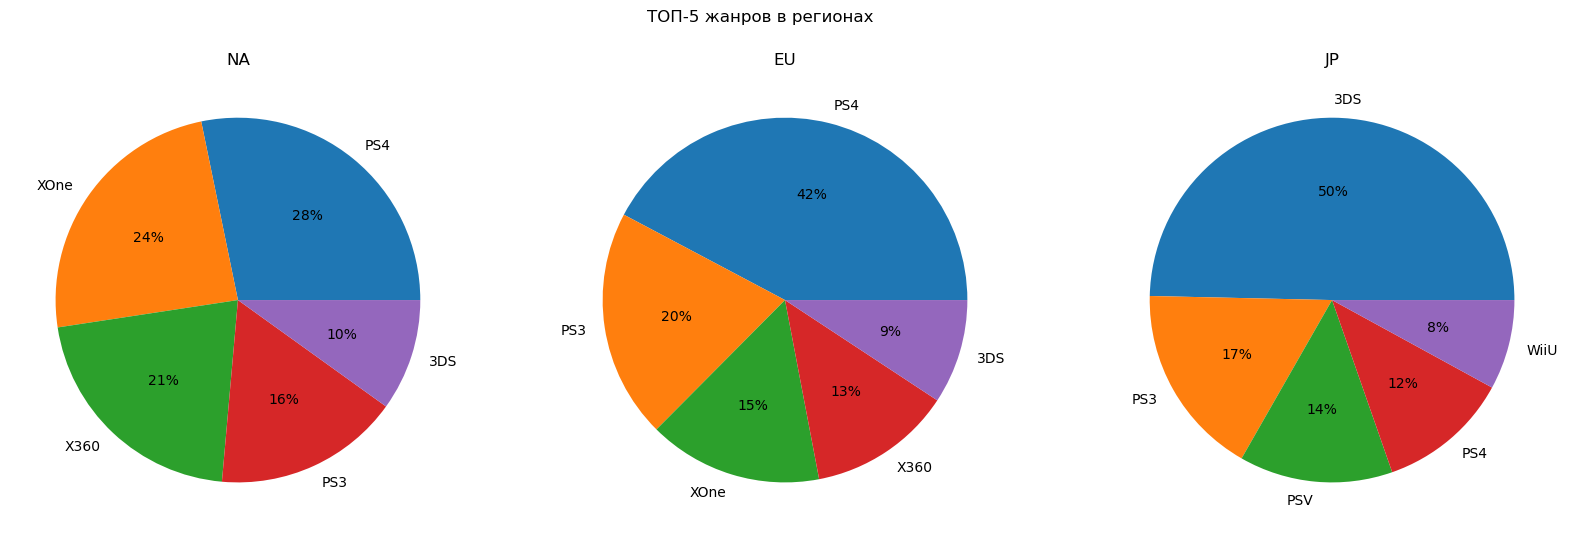

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
fig.suptitle("ТОП-5 жанров в регионах")
ax1.pie(na_platform, labels = na_platform.index , autopct = '%.0f%%')
ax1.set_title('NA')
ax2.pie(eu_platform, labels = eu_platform.index , autopct = '%.0f%%')
ax2.set_title('EU')
ax3.pie(jp_platform, labels = jp_platform.index , autopct = '%.0f%%')
ax3.set_title('JP');

Итак, по таблицам видим, что на Северную Америку продажи игр на платформы X360, XOne занимают больше половины всех мировых продаж по этим платформам. Доля европейского рынка, приходящаяся на платформы ТОП-5 занимают 21-44%. А в Японии больше половины мировых продаж (56.35%) приходится на платформу SPSV, которая ни в одном другом регионе не является популярной.  Доля продаж самой популярной платформы PS2 практически одинакова в Северной Америке (35,00%) и Европе (37,38%),  доля в Японии составялет 12,87%. 

In [85]:
#используем нашу функцию для определения топ-5 лидеров по жанрам
na_genre = table_for_region('genre', 'na_sales')
print('Популярные жанры в Северной Америке',' ', na_genre, '_____________', sep = '\n')

Популярные жанры в Северной Америке
 
genre
Action         126.05
Shooter        109.74
Sports          65.27
Role-Playing    46.40
Misc            27.49
Name: na_sales, dtype: float64
_____________


In [86]:
eu_genre = table_for_region('genre', 'eu_sales')
print('Популярные жанры в Европе',' ', eu_genre, sep = '\n')

Популярные жанры в Европе
 
genre
Action         118.13
Shooter         87.86
Sports          60.52
Role-Playing    36.97
Racing          20.19
Name: eu_sales, dtype: float64


In [87]:
jp_genre = table_for_region('genre', 'jp_sales')
print('Популярные жанры в Японии',' ', jp_genre , sep = '\n')

Популярные жанры в Японии
 
genre
Role-Playing   51.04
Action         40.49
Misc            9.20
Fighting        7.65
Shooter         6.61
Name: jp_sales, dtype: float64


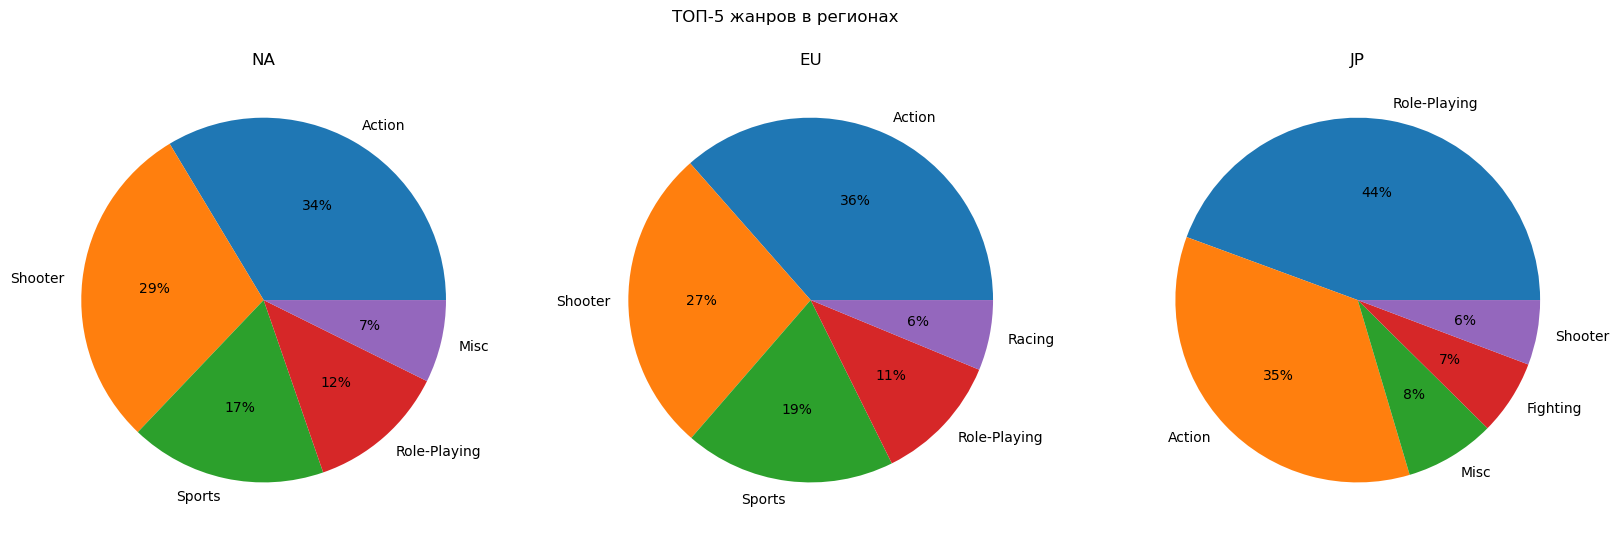

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
fig.suptitle("ТОП-5 жанров в регионах")
ax1.pie(na_genre, labels = na_genre.index , autopct = '%.0f%%')
ax1.set_title('NA')
ax2.pie(eu_genre, labels = eu_genre.index , autopct = '%.0f%%')
ax2.set_title('EU')
ax3.pie(jp_genre, labels = jp_genre.index , autopct = '%.0f%%')
ax3.set_title('JP');

Самыми популярными жанрами являются:  
В Северной Америке - Action, Shooter, Sports, Role-Playing, Misc
В Европе -           Action, Shooter, Sports, Role-Playing, Racing  
В Японии -           Role-Playing, Action, Misc, Fighting, Shooter 
Картина по наиболее популярным жанрам в Северной Америке и Европе похожа, отличается только пятым местом: в Америке это Misc, а в Европе Racing. В Японии жанр Role-Playing сместил Action на второе место. В пятерке лидеров также есть жанры Fighting, Shooter, каких нет в ТОП-5 жанров в других регионах.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для того, чтобы построить понятный график и посчитать коэффициент корреляции, переведем категориальные переменные в числовые.

In [89]:
data_last_four_year['rating'].unique()

array(['M', 'unknown', 'E', 'T', 'E10+'], dtype=object)

In [90]:
data_last_four_year['rating'].value_counts()

unknown    977
M          369
T          333
E          302
E10+       252
Name: rating, dtype: int64

«E» («Everyone») — «Для всех»:   
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»:  
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.  
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.

In [91]:
#напишем функцию для перевода категориальных переменных в числовые для подсчета корреляции
def rating_number(row):
    if row['rating'] == 'E':
        return 1
    if row['rating'] == 'E10+':
        return 10
    if row['rating'] == 'T':
        return 13
    if row['rating'] == 'M':
        return 17
    else:
        return 0

In [92]:
#добавим новый столбец с численным рейтингом
data['rating_number'] = data.apply(rating_number, axis=1)

In [93]:
import warnings
warnings.filterwarnings("ignore")

data_last_four_year['rating_number'] = data['rating_number']

In [94]:
data_last_four_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   all_sales        2233 non-null   float64
 9   critic_score     2233 non-null   int32  
 10  user_score       2233 non-null   float64
 11  rating           2233 non-null   object 
 12  rating_number    2233 non-null   int64  
dtypes: float64(6), int32(2), int64(1), object(4)
memory usage: 226.8+ KB


In [95]:
#создадим функцию для вывода графика
def sales_esrb (region_sales):
    data_last_four_year.pivot_table(index='rating_number', values=region_sales, aggfunc='sum')\
   .plot(grid=True, style='o-', figsize=(5, 5));

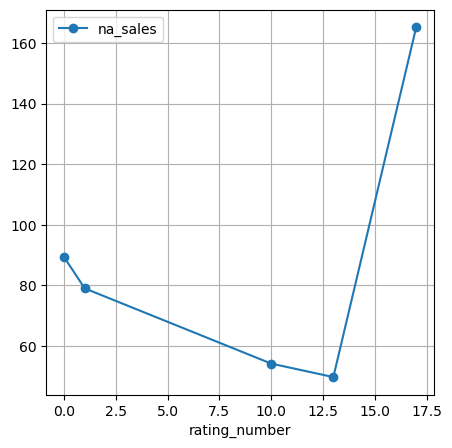

In [96]:
sales_esrb('na_sales')

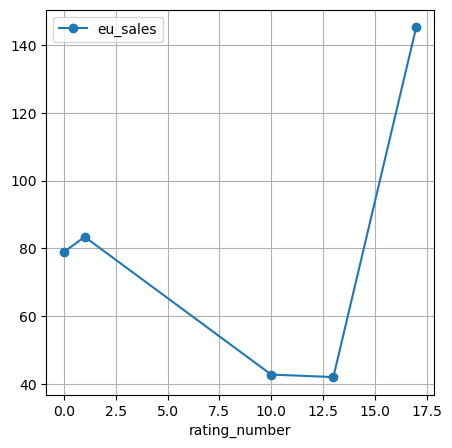

In [97]:
sales_esrb('eu_sales')

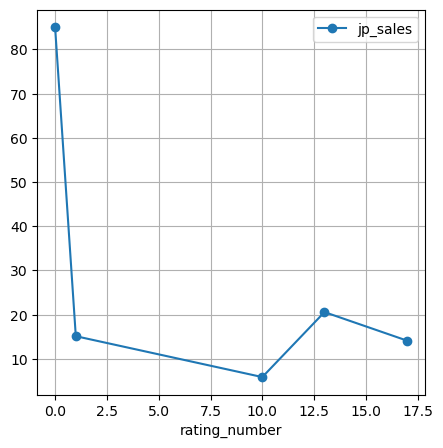

In [98]:
sales_esrb('jp_sales')

In [99]:
na_rating = table_for_region('rating', 'na_sales')
eu_rating = table_for_region('rating', 'eu_sales')
jp_rating = table_for_region('rating', 'jp_sales')

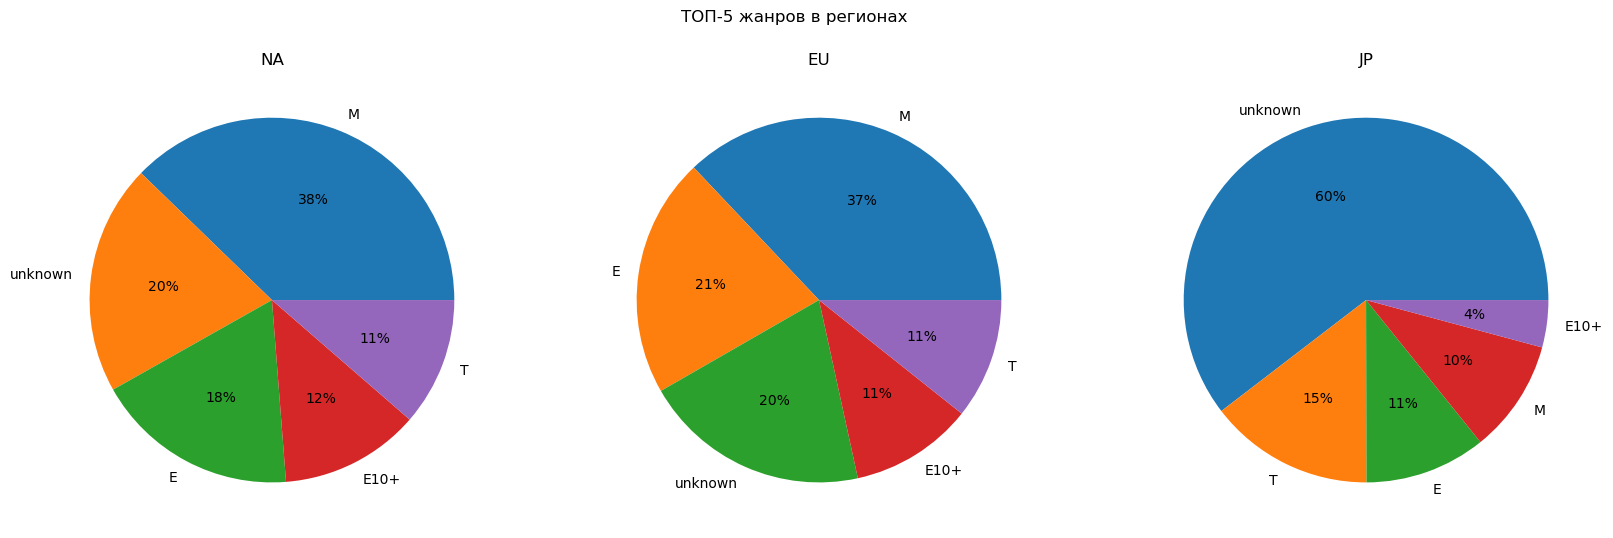

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))
fig.suptitle("ТОП-5 жанров в регионах")
ax1.pie(na_rating, labels = na_rating.index , autopct = '%.0f%%')
ax1.set_title('NA')
ax2.pie(eu_rating, labels = eu_rating.index , autopct = '%.0f%%')
ax2.set_title('EU')
ax3.pie(jp_rating, labels = jp_rating.index , autopct = '%.0f%%')
ax3.set_title('JP');

В Америке и Европе картина похожа, продано больше всего игр с возрастным рейтингом M, на втором месте игры с рейтингом E.  
В Японии наиболее популярны игры T, второе место делят игры с рейтингом Е. В Японии большая доля игр без рейтинга - 60%, потому что в Японии нет обязательного присвоения возрастной категории выпускаемым играм, в отличии от Северной Америки и Японии.

Портрет пользователя по регионам получился такой:
- В Северной Америке и Европе пользователи одинаковые - любят игры на платформе PS4 в жанре Action c рейтингом «M» — «Для взрослых»
- В Японии - покупают игры на платформе 3DC в жанре Role-Playing с рейтингом «T» («Teen») — «Подросткам», 13+.  
Количество продаж в зависимости от рейтинга различается.

## Проверка гипотез

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для этого сформируем нулевую и альтрнативную гипотезы. В нулевой гипотезе будем предполагать, что средние по выборкам из каждой совокупности платформ равны. Проверим, можно ли использовать t-тест для проверки гипотезы.
- Генеральные совокупности не зависят друг от друга. Игры на двух разных платформах не зависят друг от друга.
- Выборочные средние должны быть нормально распределены. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. 
- Выборки у нас разного размера, можем предположить, что дисперсии у генеральных совокупностей разные, поэтому при расчете поставим параметр equal_var = False.  

Для проверки гипотезы, можем использовать t-тест.

Сформулируем гипотезу:  
Н0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Н1 - Средние пользовательские рейтинги платформ Xbox One и PC разные;  
alpha = 0.05

In [101]:
# импортируем библиотеку
from scipy import stats as st

In [102]:
#отфильтруем данные за актуальный период, в которых были поставлены заглушки 555
clear555_data = data_last_four_year[data_last_four_year['user_score'] != 555]

In [103]:
xbox_one_platform = clear555_data[clear555_data['platform'] == 'XOne']['user_score']
pc_platform = clear555_data[clear555_data['platform'] == 'PC']['user_score']

In [104]:
#проверим гипотезу с помощью t-теста
results = st.ttest_ind(xbox_one_platform, pc_platform, equal_var = False)

alpha = 0.05 

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


p-value при расчетах получилась равная примерно 0,15, в результате не получилось отвергнуть нулевую гипотезу, а это значит что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [105]:
#проверим средние 
print(round(xbox_one_platform.mean(),4))
print(round(pc_platform.mean(),4))

6.5214
6.2697


Средние близки по значениям, а значит гипотеза сформулирована верна.

Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. Для этого сформируем нулевую и альтрнативную гипотезы. В нулевой гипотезе будем предполагать, что средние по выборкам из каждой совокупности жанров равны. Также как и в предыдущей задаче, можем использовать t-тест.

In [106]:
xbox_one_genre = clear555_data[clear555_data['genre'] == 'Action']['user_score']
pc_genre = clear555_data[clear555_data['genre'] == 'Sports']['user_score']

In [107]:
#проверим средние
print(round(xbox_one_genre.mean(),4))
print(round(pc_genre.mean(),4))

6.8375
5.2381


Средние разные, сформулируем гипотезы.

Сформулируем гипотезу:  
Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые;  
Н1 - Средние пользовательские рейтинги жанров Action и Sports разные;  
alpha = 0.05

In [108]:
#проверим гипотезу с помощью t-теста
results = st.ttest_ind(xbox_one_genre, pc_genre, equal_var = False)

alpha = 0.05 

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


p-value при расчетах получилась равная примерно 1,45, гипотезу Н0 отвергаем, а значит гипотеза, что рейтинги пользователей жанров Action и Sports разные - верна.

## Выводы

В проекте была проделана следующая работа:  
- изучены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы;
- на этапе предобработки данных определены пропущенные значения, заполнены пропущенные значения там, где это возможно, изменены типы данных там, где это было необходимо, устранены неявные дубликаты;  
- рассчитаны и добавлены в таблицу некоторые значения для дальнейшего использования в анализе;  
- определены наиболее популярные платформы за 36 лет - PS2, X360, PS3, Wii, DS, PS
- определен актуальный период за 2012-2016 год;
- определены наиболее популярные платформы за этот период - PS4, PS3, XOne, 3DS, X360;  
- определено, что за последние годы идет сильный спад продаж игр для всех платформ, как по количеству выпущенных игр, так и по кол-ву проданных экземпляров;  
- потенциально прибыльными платформами обозначены PS4, XOne, PC;
- выявлено, что оценки пользователей и критиков не влияют напрямую на продажи, но у наиболее продаваемых игр - высокие рейтинги, а у низкие рейтинги стоят у игр, продажи которых не велики;  
- найдены наиболее популярные жанры (Shooter, Sports, Platform);  
- составлен портрет пользователя по регионам:  
-- В Северной Америке и Европе пользователи одинаковые - любят игры на платформе PS4 в жанре Action c рейтингом «M» — «Для взрослых»;  
-- В Японии - покупают игры на платформе 3DC в жанре Role-Playing с рейтингом «T» («Teen») — «Подросткам», 13+.  
- Количество продаж в зависимости от рейтинга ESRB различается;  
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- средние ползовательские рейтинги пользователей жанров Action и Sports - разные.

Таким образом, для нашего магазина "Стримчик" надо делать ставку на игры на платформах PS4, XOne, PC, жанра Shooter, Sports, Platform и для каждого региона ориентироваться на составленный портрет пользователя.